In [2]:
!pip install dill nltk matplotlib seaborn scikit-learn spacy

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.6 MB/s eta 0:00:00 0:00:01
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 301.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 259.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
twcc-cli 0.6.1 requires Click==7.0,

In [1]:
!pip install tensorflow_hub tensorflow

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for numpy>=1.12.0 from https://files.pythonhosted.org/packages/64/41/284783f1014685201e447ea976e85fed0e351f5debbaf3ee6d7645521f1d/numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 228.4 MB/s eta 0:00:0000:01:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1+1.gc785c8f1f requires numpy<1.25,>=1.21, but you have numpy 1.26.2 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [41]:
!pip install numpy

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import torch
import os
import dill
import glob, csv
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt') # Download this as this allows you to tokenize words in a string.
lemmatizer = WordNetLemmatizer()


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import re
import string
import seaborn as sns
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/catking14/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/catking14/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Convert CSV to Dataframe

In [ ]:
#convert csv to dataframe
train_dataframe = pd.read_csv("/content/drive/MyDrive/Deep-Learning-based-Authorship-Identification/data/mega_train.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_dataframe = pd.read_csv("/content/drive/MyDrive/Deep-Learning-based-Authorship-Identification/data/mega_test.csv")

In [ ]:
new_csv = []
skip = True

with open("/content/drive/MyDrive/Deep-Learning-based-Authorship-Identification/data/attack_train.csv", "r") as attack_csv:
  content = csv.reader(attack_csv)

  for row in content:
    if skip == True:
      skip = False
      continue

    # print(row[0])
    str_temp = re.findall(r"'(.*?)'|\"(.*?)\"", row[0])
    final_str = []

    for words in str_temp:
      if(words[0] == ""):
        final_str.append(words[1])
      else:
        final_str.append(words[0])
    new_csv.append([" ".join(final_str), row[1]])
    # break

with open("/content/drive/MyDrive/Deep-Learning-based-Authorship-Identification/data/attack_train_str.csv", "w") as attack_str:
  writer = csv.writer(attack_str)
  writer.writerow(["text", "Author_num"])

  for article in new_csv:
    writer.writerow(article)

In [ ]:
train_dataframe.head()

,index,text,Author
0,3225,Treasury Secretary Robert Rubin goes to Capito...,AaronPressman
1,744,U.S. banks will be able to significantly incre...,AaronPressman
2,737,Supreme Court justices Wednesday sharply quest...,AaronPressman
3,740,"Fast running out of options, federal credit un...",AaronPressman
4,3241,The U.S. Commerce Department showed an unexpec...,AaronPressman


In [ ]:
test_dataframe.head()

,index,text,Author,hopeful_test
0,8,Britain's Ladbroke Group Plc Monday concluded ...,SimonCowell,1
1,10,Scottish Amicable on Thursday asked for firm o...,SimonCowell,1
2,15,Scottish Amicable's plans to float on the stoc...,SimonCowell,1
3,17,The head of the Securities and Investments Boa...,SimonCowell,1
4,20,Britain's Britannic Assurance declared on Tues...,SimonCowell,1


 Create new column with author number mappings for ML

In [ ]:
# create new col with author number mappings for ML
auth_sort = sorted(train_dataframe['Author'].unique())
dictOfAuthors = { i : auth_sort[i] for i in range(0, len(auth_sort) ) }
swap_dict = {value:key for key, value in dictOfAuthors.items()}
train_dataframe['Author_num'] = train_dataframe['Author'].map(swap_dict)

In [ ]:
# create new col with author number mappings for ML
auth_sort = sorted(test_dataframe['Author'].unique())
dictOfAuthors = { i : auth_sort[i] for i in range(0, len(auth_sort) ) }
swap_dict = {value:key for key, value in dictOfAuthors.items()}
test_dataframe['Author_num'] = test_dataframe['Author'].map(swap_dict)

In [ ]:
train_dataframe.head()

,index,text,Author,Author_num
0,3225,Treasury Secretary Robert Rubin goes to Capito...,AaronPressman,0
1,744,U.S. banks will be able to significantly incre...,AaronPressman,0
2,737,Supreme Court justices Wednesday sharply quest...,AaronPressman,0
3,740,"Fast running out of options, federal credit un...",AaronPressman,0
4,3241,The U.S. Commerce Department showed an unexpec...,AaronPressman,0


In [ ]:
test_dataframe.head()

,index,text,Author,hopeful_test,Author_num
0,8,Britain's Ladbroke Group Plc Monday concluded ...,SimonCowell,1,44
1,10,Scottish Amicable on Thursday asked for firm o...,SimonCowell,1,44
2,15,Scottish Amicable's plans to float on the stoc...,SimonCowell,1,44
3,17,The head of the Securities and Investments Boa...,SimonCowell,1,44
4,20,Britain's Britannic Assurance declared on Tues...,SimonCowell,1,44


In [ ]:
# only left text(article) in dataframe
test_dataframe = test_dataframe.drop(columns='Author')
# train_dataframe = train_dataframe.drop(columns='Author')
# train_dataframe = train_dataframe.drop(columns='index')
test_dataframe = test_dataframe.drop(columns='index')
test_dataframe = test_dataframe.drop(columns='hopeful_test')

In [ ]:
# check out excerpted data
test_dataframe.head()

,text,Author_num
0,Britain's Ladbroke Group Plc Monday concluded ...,44
1,Scottish Amicable on Thursday asked for firm o...,44
2,Scottish Amicable's plans to float on the stoc...,44
3,The head of the Securities and Investments Boa...,44
4,Britain's Britannic Assurance declared on Tues...,44


In [ ]:
train_dataframe.head()

,text,Author_num
0,Treasury Secretary Robert Rubin goes to Capito...,0
1,U.S. banks will be able to significantly incre...,0
2,Supreme Court justices Wednesday sharply quest...,0
3,"Fast running out of options, federal credit un...",0
4,The U.S. Commerce Department showed an unexpec...,0


In [ ]:
list_to_choose_train = train_dataframe.text.apply(lambda x : len(x)) > 0
train_df_article = train_dataframe[list_to_choose_train]

In [ ]:
list_to_choose_test = test_dataframe.text.apply(lambda x : len(x)) > 0
test_df_article = test_dataframe[list_to_choose_test]

In [ ]:
train_df_article.to_csv(r'/content/drive/MyDrive/Deep-Learning-based-Authorship-Identification/data/train.csv', index = False)

In [ ]:
test_df_article.to_csv(r'/content/drive/MyDrive/Deep-Learning-based-Authorship-Identification/data/test_v3.csv', index = False)

To use *torchtext* here, we might need to re-install old version of it.

Here we use torchtext 0.6.0.

In [4]:
# We have to use old version of torchtext to use data.Field attribute
!pip install torchtext==0.6.0

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.2 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
!python -m spacy download en_core_web_sm

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.6 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
#import torch
#import spacy
#nlp = spacy.load("en_core_web_sm")
from torchtext import data
TEXT = data.Field(sequential=True, tokenize="spacy", tokenizer_language="en_core_web_sm", lower=True, include_lengths=True) # new tokenizer_language to fit new model
SCORE = data.Field(sequential=False, use_vocab=False)

2023-12-23 17:45:34.275512: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 17:45:34.275562: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 17:45:34.276865: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 17:45:34.284026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Utilizing Datafields

In [3]:
datafields = [("text", TEXT),
              ("Author_num", SCORE)]

train= data.TabularDataset(
    path='./data/train.csv',
    format='csv',fields=datafields,skip_header = True)

val = data.TabularDataset(
    path='./data/test.csv',
    format='csv',fields=datafields,skip_header = True)


# take only partial example
# train_examples = [example for example in train]
# train_subset = train_examples[:1]
# train = data.Dataset(train_subset, fields=datafields)

In [ ]:
ex1 = [['who', 'is', 'threr'], 1]
ex2 = data.Example.fromlist(ex1, fields=datafields)
print(ex2.text)
print(ex2.Author_num)
print(train[0].text)

['who', 'is', 'threr']
1
['treasury', 'secretary', 'robert', 'rubin', 'goes', 'to', 'capitol', 'hill', 'on', 'tuesday', 'to', 'further', 'explain', 'the', 'clinton', 'administration', "'s", 'bank', 'reform', 'plan', ',', 'but', 'lawmakers', 'are', 'likely', 'to', 'focus', 'foremost', 'on', 'what', 'the', 'plan', 'left', 'out', '.', '\n', 'the', 'clinton', 'proposal', ',', 'along', 'with', 'several', 'pending', 'bills', ',', 'would', 'scrap', 'the', '1933', 'glass', '-', 'steagall', 'act', "'s", 'separation', 'of', 'banking', 'from', 'other', 'financial', 'services', '.', '\n', 'on', 'the', 'contentious', 'issue', 'of', 'going', 'further', 'and', 'allowing', 'banks', 'to', 'combine', 'with', 'commercial', 'firms', ',', 'however', ',', 'the', 'administration', 'ducked', '.', ' \n', 'instead', ',', 'the', 'clinton', 'plan', 'unveiled', 'by', 'rubin', 'on', 'may', '21', ',', 'offered', 'two', 'alternatives', 'and', 'left', 'the', 'hard', 'choice', 'to', 'congress', '.', '\n', '"', 'we', 't

In [4]:
from torchtext import vocab
from torchtext.vocab import GloVe
TEXT.build_vocab(train, val, min_freq = 3, vectors=GloVe(name='6B', dim=100))

**Iterators**

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # choose device according to hardware support
BATCH_SIZE = 64
# train_iterator = data.BucketIterator(
#     train,
#     batch_size = BATCH_SIZE,
#     sort_key = lambda x: len(x.text),
#     sort_within_batch = True,
#     repeat=False,
#     shuffle=True,
#     device = device)

val_iterator = data.BucketIterator(
    val,
    batch_size = BATCH_SIZE,
    sort=False,
    sort_key = lambda x: len(x.text),
    sort_within_batch = True,
    repeat=False,
    shuffle=False,
    device = device)


# print(train.examples[0].text)
# print(val_iterator.data()[0].text)

# for batch in val_iterator:
#   c, cl = batch.text
#   print(c[0])
#   break


In [6]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import numpy as np
import matplotlib
import pandas as pd
import dill
import random
import torch.optim as optim
import matplotlib.pyplot as plt

**Network Architecture**

In [7]:
class AuthorClassifier(nn.Module):

    def __init__(self, mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings):
      super(AuthorClassifier, self).__init__()

      if mode not in ['rnn', 'lstm', 'gru', 'bilstm']:
        raise ValueError("Choose a mode from - rnn / lstm / gru / bilstm")

      self.mode = mode
      self.output_size = output_size
      self.hidden_size = hidden_size
      self.vocab_size = vocab_size
      self.embedding_length = embedding_length
      self.embedding = nn.Embedding(self.vocab_size,self.embedding_length)
      self.embedding.weight = nn.Parameter(word_embeddings,requires_grad = True)  # True to keep gradient



      if self.mode == 'rnn':
        self.network = nn.RNN(self.embedding_length,self.hidden_size)
      elif self.mode == 'lstm':
        self.network = nn.LSTM(self.embedding_length,self.hidden_size)
      elif self.mode == 'gru':
        self.network = nn.GRU(self.embedding_length,self.hidden_size)
      elif self.mode == 'bilstm':
        self.network = nn.LSTM(self.embedding_length,self.hidden_size,bidirectional = True)


      self.fclayer = nn.Linear(self.hidden_size,self.output_size)


    def forward(self, text, text_lengths):
      text_embeddings = self.embedding(text)
      pack_sequence = nn.utils.rnn.pack_padded_sequence(text_embeddings,text_lengths.cpu()) # lengths.cpu() for matching new input format

      if self.mode in ('lstm','bilstm'):
        a,(hidden,cell) = self.network(pack_sequence)
        if self.mode == 'bilstm':
          hidden = hidden[0,:,:]+ hidden[1,:,:]
      else:
        a,hidden = self.network(pack_sequence)
      hidden = hidden.squeeze(0)
      pred = self.fclayer(hidden)
      return pred

**Training and testing models**

In [28]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay  # new version of plot_confusion_matrix

# grad_cache = []
def store_grad(grad):
  grad_cache.append(grad)
  return grad

def train_classifier(model, dataset_iterator, loss_function, optimizer, num_epochs, log = "runs", verbose = False, recurrent = True):
  writer = SummaryWriter(log_dir=log)
  model.train()
  step = 0
  f1score_train = []
  accuracy_train = []
  loss_train = []

#   model.embedding.weight.register_hook(store_grad)
  for epoch in range(num_epochs):
    correct = 0
    total = 0
    total_loss = 0
    f1 = 0
    f1_step = 0

    for batch in dataset_iterator:
      comment, comment_lengths = batch.text
      labels = batch.Author_num

      # print(comment.size())
      # print(labels)

      batch_size = len(labels)
      optimizer.zero_grad()
      output = model(comment, comment_lengths).squeeze(0)
      # model.embedding.weight.retain_grad()

      # vocab_list = TEXT.vocab.itos
      # tmp = []
      # for idx in range(64):
      #   tmp.append(vocab_list[comment[0][idx]])

      # print(tmp)

      # reshape when only one article in training set
      if output.size() == torch.Size([50]):
        output = output.view(1, 50)

      loss = loss_function(output, labels.long())
      loss.backward()
      nn.utils.clip_grad_norm_(model.parameters(),0.5)
      optimizer.step()

      pred = torch.max(output.data,1).indices
      f1 += sklearn.metrics.f1_score((labels.cpu()).numpy(), (pred.cpu()).numpy(),average= 'macro')
      correct += (torch.sum(pred == labels)).item()
      total += len(labels)
      total_loss += loss.item()
      f1_step += 1

      if ((step % 100) == 0):
        writer.add_scalar("Loss/train", total_loss/total, step)
        writer.add_scalar("Acc/train", correct/total, step)
        writer.add_scalar("F1 Score/train", f1/f1_step, step)

      step = step+1
    f1score_train.append(f1/f1_step)
    loss_train.append(total_loss/total)
    accuracy_train.append(correct/total)
    print('---Training statistics---',"Epoch: %s Acc: %s Loss: %s"%(epoch+1, correct/total, total_loss/total),'F1 Score:',f1/f1_step,)

  return loss_train,f1score_train,accuracy_train

def evaluate_classifier(model, dataset_iterator, loss_function, recurrent = True):
  model.eval()

  correct = 0
  total = 0
  total_loss = 0
  overall_pred = []
  overall_label = []
  accuracy_test = []
  loss_test = []
  f1_step = 0
  f1 = 0

  for batch in dataset_iterator:
    comment, comment_lengths = batch.text
    labels = batch.Author_num   # tag of author number
    output = model(comment, comment_lengths).squeeze(0)
    # print(output.data)
    # print(len(output.data))
    # prediction will be the values in each row
    # they represent the possibility(weight) of an article which belongs to jth author(in jth row)

    # print(comment[0], comment_lengths)
    # print(model.embedding(comment[0]))
    # print(dataset_iterator.data())
    # print(len(labels))

    # print(len(model.embedding.weight.grad))
    # model.embedding.weight.grad stores the gradient of each word to it's embedding
    # use TEXT.vocab.stoi to generate dictionary to map token: idx, then use idx to get grad by model.embedding.weight.grad[idx]

    # vocab_list = TEXT.vocab.itos
    # tmp = []
    # for idx in range(64):
    #   tmp.append(vocab_list[comment[0][idx]])

    # print(tmp)

    loss = loss_function(output, labels.long()) # .long means .to(torch.int64)
    pred = torch.max(output.data,1).indices
    correct += (torch.sum(pred == labels)).item()
    total += len(labels)
    total_loss += loss.item()
    ap = pred.cpu()
    a = np.asarray(ap)
    labels = labels.cpu()
    b = np.asarray(labels)
    f1_step += 1
    overall_pred.append(a)
    overall_label.append(b)

  overall_p= [val for sublist in overall_pred for val in sublist]
  overall_l = [val for sublist in overall_label for val in sublist]
  f1ss = sklearn.metrics.f1_score(overall_l,overall_p,average= 'macro')
  accuracy_test.append(correct/total)
  loss_test.append(total_loss/total)
  print("Validation statistics: Acc: %s Loss: %s"%(correct/total, total_loss/total),'F1 Score:',f1ss)
  return overall_pred,overall_label,accuracy_test,f1ss,loss_test

Simularity calculation


In [8]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np

In [9]:
similarity_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def similarity_cal(sentence1, sentence2):
  # create sentence embedding
  embedding1 = similarity_model([sentence1])[0]
  embedding2 = similarity_model([sentence2])[0]

  # calculate cosine simularity
  cosine_similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
  # print("相似度:", cosine_similarity)

  return cosine_similarity

2023-12-23 17:48:33.450899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31150 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:dc:00.0, compute capability: 7.0


In [ ]:
ok = [2, 3, 1]
print(sorted(ok))
print(ok)

[1, 2, 3]
[2, 3, 1]


Crucial word search and replacement generator

In [9]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizerFast, pipeline

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def create_replacement(article_model, embedding_grad, example, influence_rank=5, replacement_rank=5, sim_threshold=0.9):
    # calculate gradient norm for each word's embedding
    grad_norm = torch.norm(embedding_grad, dim=1)
    grad_dict = {}

    for i in range(len(grad_norm)):
        grad_dict[vocab_list[i]] = grad_norm[i]

    grad_dict_sorted = {k: v for k, v in sorted(grad_dict.items(), key=lambda item: item[1], reverse=True)}
    grad_list_sorted = list(grad_dict_sorted.keys())
    to_replace = []

    for choose in grad_list_sorted:
        if influence_rank == 0:
            to_replace = grad_list_sorted
            break

        if choose in example.text:
            to_replace.append(choose)

        if len(to_replace) == influence_rank:
            break


    replaced = 0
    final_modified = example.text.copy()
    
    # masking for bert
    for retired in to_replace:
        if retired in example.text:
            final_modified[final_modified.index(retired)] = "[MASK]"
            replaced += 1
        
        if replaced >= replacement_rank:
            break
            

    # replace word with pre-trained bert uncased
    concat_article = " ".join(final_modified)
    concat_article = concat_article.split(".")
    remains = [art for art in concat_article if "[MASK]" in art]
    

    for sentence in remains:
        counts = sentence.count("[MASK]")
        
        if counts == 1:
            results = influence(sentence)
            idx = final_modified.index("[MASK]")
#             print(idx)
            final_modified[idx] = results[0]["token_str"]    # find the replacement with highest score
        else:
            for results in influence(sentence):
                idx = final_modified.index("[MASK]")
#                 print(idx)

                final_modified[idx] = results[0]["token_str"]    # find the replacement with highest score

    alternatives = data.Example.fromlist([" ".join(final_modified), example.Author_num], fields=datafields)
    return alternatives

# print top 5 word of gradient norm
# def top_influence_words(k):
#   ret = list(grad_dict_sorted.keys())[:k]
#   return ret

# to_replace = top_influence_words(5)

Training for word replacement

This part is used for attacking.

In [11]:
#LSTM based
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.tensorboard import SummaryWriter
plt.figure(figsize = (10,10))


output_size = 50
hidden_size = 300
vocab_size = len(TEXT.vocab)
embedding_length = 100
word_embeddings = TEXT.vocab.vectors
num_epochs = 1
mode = 'lstm'

# print(len(word_embeddings), len(TEXT.vocab.itos))
# print(len(word_embeddings[0]))
# print(len(TEXT.vocab))
vocab_dict = TEXT.vocab.stoi
vocab_list = TEXT.vocab.itos
# print(vocab_dict["thursday"])


# log_dir = 'runs/lstm1'
attack_list = []

# import pretrained bert
influence = pipeline("fill-mask", model="./data/bert-0", tokenizer="bert-base-uncased")


for author in range(50):  # take val as test here
    single_author_list = []

    for example in val:
        if int(example.Author_num) == author:
            single_author_list.append(example)

#   print(len(single_author_list))
 
    test_data = data.Dataset(single_author_list, fields=datafields)
    test_iterator = data.BucketIterator(test_data, batch_size = BATCH_SIZE, sort=False, sort_key = lambda x: len(x.text), sort_within_batch = True, repeat=False, shuffle=True, device = device)
    art_model = AuthorClassifier(mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings)
    art_model = art_model.to(device)

   # simple train for testing article to get gradient
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(art_model.parameters(), lr=1e-2)
    temp_loss,temp_f1,temp_accs = train_classifier(art_model, test_iterator, loss_function, optimizer, log = None, num_epochs = 5)

    for example in single_author_list:
        attack_list.append(create_replacement(None, art_model.embedding.weight.grad, example, influence_rank=0, replacement_rank=30))



---Training statistics--- Epoch: 1 Acc: 0.0 Loss: 0.1961155891418457 F1 Score: 0.0
---Training statistics--- Epoch: 2 Acc: 1.0 Loss: 0.02107863873243332 F1 Score: 1.0
---Training statistics--- Epoch: 3 Acc: 1.0 Loss: 0.0003038623835891485 F1 Score: 1.0
---Training statistics--- Epoch: 4 Acc: 1.0 Loss: 1.62503361934796e-05 F1 Score: 1.0
---Training statistics--- Epoch: 5 Acc: 1.0 Loss: 1.8456239558872767e-06 F1 Score: 1.0
---Training statistics--- Epoch: 1 Acc: 0.0 Loss: 0.19817125797271729 F1 Score: 0.0
---Training statistics--- Epoch: 2 Acc: 1.0 Loss: 0.027372521162033082 F1 Score: 1.0
---Training statistics--- Epoch: 3 Acc: 1.0 Loss: 0.0004002120811492205 F1 Score: 1.0
---Training statistics--- Epoch: 4 Acc: 1.0 Loss: 1.678330299910158e-05 F1 Score: 1.0
---Training statistics--- Epoch: 5 Acc: 1.0 Loss: 1.614961729501374e-06 F1 Score: 1.0
---Training statistics--- Epoch: 1 Acc: 0.0 Loss: 0.19779113531112671 F1 Score: 0.0
---Training statistics--- Epoch: 2 Acc: 1.0 Loss: 0.018009002506

---Training statistics--- Epoch: 1 Acc: 0.0 Loss: 0.19581655263900757 F1 Score: 0.0
---Training statistics--- Epoch: 2 Acc: 1.0 Loss: 0.020282113552093507 F1 Score: 1.0
---Training statistics--- Epoch: 3 Acc: 1.0 Loss: 0.00032935417257249353 F1 Score: 1.0
---Training statistics--- Epoch: 4 Acc: 1.0 Loss: 1.7552571080159396e-05 F1 Score: 1.0
---Training statistics--- Epoch: 5 Acc: 1.0 Loss: 1.943669849424623e-06 F1 Score: 1.0
---Training statistics--- Epoch: 1 Acc: 0.0 Loss: 0.1972285032272339 F1 Score: 0.0
---Training statistics--- Epoch: 2 Acc: 1.0 Loss: 0.0290914386510849 F1 Score: 1.0
---Training statistics--- Epoch: 3 Acc: 1.0 Loss: 0.0003228380810469389 F1 Score: 1.0
---Training statistics--- Epoch: 4 Acc: 1.0 Loss: 1.3759911234956235e-05 F1 Score: 1.0
---Training statistics--- Epoch: 5 Acc: 1.0 Loss: 1.3422783922578673e-06 F1 Score: 1.0
---Training statistics--- Epoch: 1 Acc: 0.1 Loss: 0.19100300073623658 F1 Score: 0.030303030303030304
---Training statistics--- Epoch: 2 Acc: 1.0 

---Training statistics--- Epoch: 5 Acc: 1.0 Loss: 5.140873327036388e-07 F1 Score: 1.0
---Training statistics--- Epoch: 1 Acc: 0.0 Loss: 0.19330928325653077 F1 Score: 0.0
---Training statistics--- Epoch: 2 Acc: 1.0 Loss: 0.007481980323791504 F1 Score: 1.0
---Training statistics--- Epoch: 3 Acc: 1.0 Loss: 7.400753675028682e-05 F1 Score: 1.0
---Training statistics--- Epoch: 4 Acc: 1.0 Loss: 3.857463889289648e-06 F1 Score: 1.0
---Training statistics--- Epoch: 5 Acc: 1.0 Loss: 4.17528826801572e-07 F1 Score: 1.0
---Training statistics--- Epoch: 1 Acc: 0.0 Loss: 0.2002723217010498 F1 Score: 0.0
---Training statistics--- Epoch: 2 Acc: 1.0 Loss: 0.035652047395706175 F1 Score: 1.0
---Training statistics--- Epoch: 3 Acc: 1.0 Loss: 0.0006607449147850275 F1 Score: 1.0
---Training statistics--- Epoch: 4 Acc: 1.0 Loss: 2.4178084277082235e-05 F1 Score: 1.0
---Training statistics--- Epoch: 5 Acc: 1.0 Loss: 2.0861192751908674e-06 F1 Score: 1.0
---Training statistics--- Epoch: 1 Acc: 0.0 Loss: 0.19719820

<Figure size 1000x1000 with 0 Axes>

In [12]:
# print(attack_list[0])
print(" ".join(attack_list[0].text))
# print(type(attack_list[0].text))

an international task force working to resolve the simmering controversy over desirable addresses , the committee released a draft plan friday for a substantial expansion of the total number of destinations . 
  the international ad hoc committee on domain names , formed by the internet society in october , recommended that seven new so - called top - level domains be added to the internet . 
  top - level domains are the three - letter designations most internet sites end with , such as " com " in http://www.gm.com for other web sites , " gov " in government sites and " edu " for sites run by schools . 
  the committee recommended that an unlimited number of firms be authorised to register the new addresses , although the panel said it hoped to initially approve 20 to 30 new registration services . 
  addresses for most sites are currently handed out by network solutions inc . of herndon , va . , which charges $ 100 for each registration . 
  at first , network solutions would continu

In [13]:
# transform attack articles into iterator
attack = data.Dataset(attack_list, fields=datafields)

attack_iterator = data.BucketIterator(
    attack,
    batch_size = BATCH_SIZE,
    sort=False,
    sort_key = lambda x: len(x.text),
    sort_within_batch = True,
    repeat=False,
    shuffle=False,
    device = device)

output attack list to csv

In [15]:
with open("./data/attack_bert.csv", "w") as attack_str:
    writer = csv.writer(attack_str)
    writer.writerow(["text", "Author_num"])
    
    for article in attack_list:
        writer.writerow([" ".join(article.text), article.Author_num])

Import attack article from csv

In [10]:
attack = data.TabularDataset(
    path='./data/attack_bert.csv',
    format='csv',fields=datafields,skip_header = True)

# select partial dataset
# attack_tmp = []
# for i in range(50):
#   for j in range(10):
#     attack_tmp.append(attack[80 * i + j])

# print(len(attack_tmp))
# attack = data.Dataset(attack_tmp, fields=datafields)

attack_iterator = data.BucketIterator(
    attack,
    batch_size = BATCH_SIZE,
    sort=False,
    sort_key = lambda x: len(x.text),
    sort_within_batch = True,
    repeat=False,
    shuffle=False,
    device = device)

In [ ]:
output_csv_strings = []

for articles in attack_iterator.data():
  tmp = articles.text
  flit_tmp = filter(lambda x: (x != "[" and x != "'" and x != "]"), tmp)
  tmp = " ".join(list(flit_tmp))
  print(tmp)
  output_csv_strings.append(data.Example.fromlist([tmp, articles.Author_num], fields=datafields))
  break

treasury , secretary , robert , rubin , goes , would , capitol , hill , the , tuesday , to , however , explain , one , clinton , administration , their , bank , reform , proposal , , , so , lawmakers , have , could , to , focus , foremost , on , what , the , plan , left , so , but , --202 , the , clinton , proposal , , , along , with , other , pending , bills , , , would , scrap , the , 1933 , glass , over , steagall , act , " 's " , separation , the , financial , came , other , banking , allow , . , \n , on , the , contentious , legal , of , so , further , and , allowing , banks , to , combine , with , small , companies , , , but , , , the , administration , ducked , . , --202 , instead , , , the , clinton , plan , unveiled , with , rubin , on , likely , 21 , , , offered , one , alternatives , and , left , the , hard , choice , to , lawmakers , . , \n , referred , we , think , the , issue , needs , to , would , further , debated , by , congress , , , " , the , secretary , , , one , bu

In [68]:
print(attack_iterator.data()[0].text)
print(attack_iterator.data()[0].Author_num)

['an', 'international', 'task', 'force', 'working', 'to', 'resolve', 'the', 'simmering', 'controversy', 'over', 'desirable', 'addresses', 'for', 'the', 'committee', 'released', 'a', 'draft', 'plan', 'friday', 'for', 'a', 'substantial', 'expansion', 'of', 'the', 'total', 'number', 'of', 'destinations', '.', '\n ', 'the', 'international', 'ad', 'hoc', 'committee', 'on', 'domain', 'names', ',', 'formed', 'by', 'the', 'internet', 'society', 'in', 'october', ',', 'recommended', 'that', 'seven', 'new', 'so', '-', 'called', 'top', '-', 'level', 'domains', 'be', 'added', 'to', 'the', 'internet', '.', '\n ', 'top', '-', 'level', 'domains', 'are', 'the', 'three', '-', 'letter', 'designations', 'most', 'internet', 'sites', 'end', 'with', ',', 'such', 'as', '"', 'com', '"', 'in', 'http://www.gm.com', 'for', 'other', 'private', 'sites', ',', '"', 'gov', '"', 'in', 'government', 'sites', 'and', '"', 'edu', '"', 'for', 'sites', 'run', 'by', 'schools', '.', '\n ', 'the', 'committee', 'recommended', 't

Original model training and evaluation

LSTM

In [ ]:
import gc

torch.cuda.empty_cache()
gc.collect()

378

Validation statistics: Acc: 0.757 Loss: 0.018005868405103684 F1 Score: 0.7487407949877583


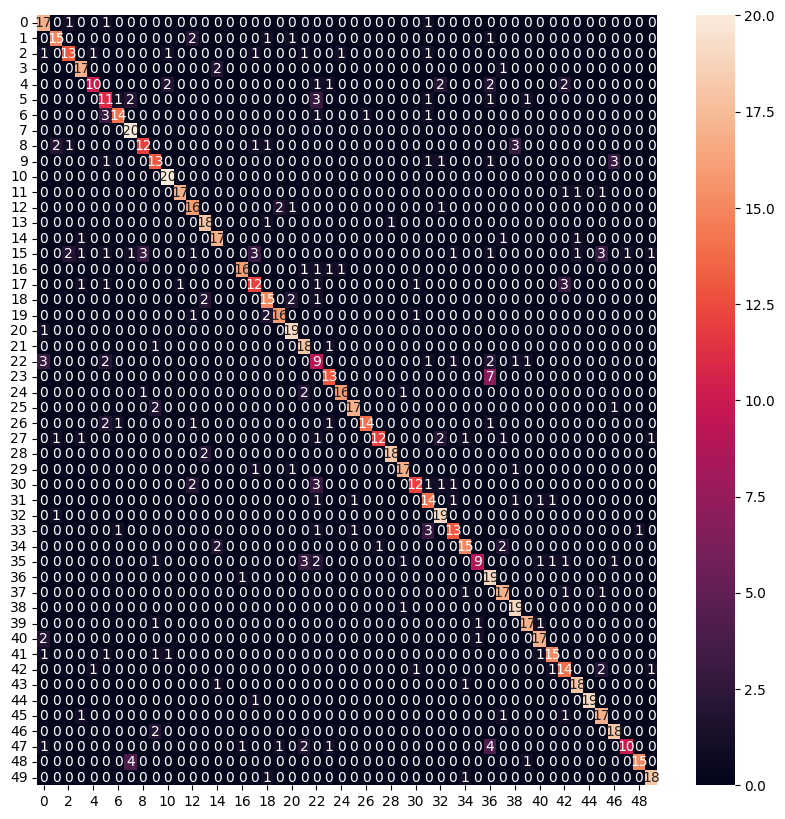

In [14]:
#LSTM
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.tensorboard import SummaryWriter
plt.figure(figsize = (10,10))


output_size = 50
hidden_size = 300
vocab_size = len(TEXT.vocab)
embedding_length = 100
word_embeddings = TEXT.vocab.vectors
num_epochs = 1
mode = 'lstm'

model = AuthorClassifier(mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings)
model.load_state_dict(torch.load("./data/baseline.pt"))
model = model.to(device)
# print(len(word_embeddings), len(TEXT.vocab.itos))
# print(len(word_embeddings[0]))
# print(len(TEXT.vocab))
# vocab_dict = TEXT.vocab.stoi
# vocab_list = TEXT.vocab.itos
# print(vocab_dict["thursday"])


loss_function = nn.CrossEntropyLoss()

# optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
# log_dir = 'runs/lstm1'
# final_acc_train_lstm  = []
# final_loss_train_lstm = []
# final_loss_test_lstm = []
# final_acc_test_lstm = []
# final_f1score_train_lstm = []
# final_f1score_test_lstm = []


# for multi in range(20):
#   loss_train,f1score,accs = train_classifier(model, train_iterator, loss_function, optimizer, log = log_dir, num_epochs = num_epochs)
#   overall_pred,overall_label,accs_test,f1ss,loss_test = evaluate_classifier(model, val_iterator, loss_function)
#   final_acc_train_lstm.append(accs[0])
#   final_acc_test_lstm.append(accs_test[0])
#   final_f1score_train_lstm.append(f1score[0])
#   final_f1score_test_lstm.append(f1ss)
#   final_loss_train_lstm.append(loss_train[0])
#   final_loss_test_lstm.append(loss_test[0])

overall_pred,overall_label,accs_test,f1ss,loss_test = evaluate_classifier(model, attack_iterator, loss_function)
# torch.save(model.state_dict(), "/content/drive/MyDrive/Deep-Learning-based-Authorship-Identification/data/baseline.pt")

cf = np.zeros((50,50))

overall_pred = [val for sublist in overall_pred for val in sublist]

overall_label = [val for sublist in overall_label for val in sublist]

ziplist = list(zip(overall_label,overall_pred))
for coordinate in ziplist:
  cf[coordinate]+=1
ax = sns.heatmap(cf,annot=True)

In [ ]:
print(auth_sort[6])

DarrenSchuettler


In [13]:
n = len(attack_iterator)
avg_sim = 0

for i in range(n):
    avg_sim += similarity_cal(" ".join(val_iterator.data()[i].text), " ".join(attack_iterator.data()[i].text))
    
avg_sim /= n

print(avg_sim)

0.4237763471901417


In [ ]:
"""
This part is to find top 5 closest words of a certain word.
We use euclidean distance in word embedding to calculate.
"""
words_in_article = []
for info in train.examples[0].text:   # train.examples[0].text is the input article
  words_in_article.append(vocab_dict[info])

words_in_article = torch.tensor(words_in_article, dtype=torch.int64)
output = model.embedding(words_in_article)
np_word_dict = {}

# create dictionary of word-embedding pair of np.array of embeddings
for i in range(len(output)):
  # print(tmp[i])
  # print(vocab_list[tmp[i]])
  # print(output[i])
  li = [float(num) for num in output[i]]
  # print(li, len(li))
  np_word_dict[vocab_list[words_in_article[i]]] = np.array(li)

# print(np_word_dict)

In [ ]:
# calculate closest word by euclidean distance in word embedding
def find_closest_embeddings(embedding):
    return sorted(np_word_dict.keys(), key=lambda word: spatial.distance.euclidean(np_word_dict[word], embedding))

alternatives = []

for retired in to_replace:
  alternatives.append(find_closest_embeddings(np_word_dict[retired])[1:6])  # [1:6] is because [0] will always be itself

print(alternatives)

[['(', '.', ',', 'is', 'also'], ['last', 'one', 'over', ',', 'with'], ['<unk>', '\n', ' \n', 'exception', '898'], [')', ',', '.', 'or', 'from'], ['\n', '8312', '<unk>', ' \n', 'respectively']]


GRU

In [ ]:
#GRU
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.tensorboard import SummaryWriter
plt.figure(figsize = (10,10))



output_size = 50
hidden_size = 300
vocab_size = len(TEXT.vocab)
embedding_length = 100
word_embeddings = TEXT.vocab.vectors
num_epochs = 1
mode = 'gru'

model = AuthorClassifier(mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings)
model = model.to(device)


loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
log_dir = 'runs/gru'
final_acc_train_gru  = []
final_acc_test_gru = []
final_f1score_train_gru = []
final_f1score_test_gru = []
final_loss_train_gru = []
final_loss_test_gru = []

for multi in range(20):
  loss_train,f1score,accs = train_classifier(model, train_iterator, loss_function, optimizer, log = log_dir, num_epochs = num_epochs)
  overall_pred,overall_label,accs_test,f1ss,loss_test = evaluate_classifier(model, val_iterator, loss_function)
  final_acc_train_gru.append(accs[0])
  final_loss_train_gru.append(loss_train[0])
  final_acc_test_gru.append(accs_test[0])
  final_f1score_train_gru.append(f1score[0])
  final_f1score_test_gru.append(f1ss)
  final_loss_test_gru.append(loss_test[0])


cf = np.zeros((50,50))

overall_pred = [val for sublist in overall_pred for val in sublist]

overall_label = [val for sublist in overall_label for val in sublist]

ziplist = list(zip(overall_label,overall_pred))
for coordinate in ziplist:
  cf[coordinate]+=1
ax = sns.heatmap(cf,annot=True)

BiLSTM

In [ ]:
#bilstm
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.tensorboard import SummaryWriter
plt.figure(figsize = (10,10))



output_size = 50
hidden_size = 300
vocab_size = len(TEXT.vocab)
embedding_length = 100
word_embeddings = TEXT.vocab.vectors
num_epochs = 1
mode = 'bilstm'

model = AuthorClassifier(mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings)
model = model.to(device)


loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
log_dir = 'runs/bilstm'
final_acc_train_bilstm  = []
final_acc_test_bilstm = []
final_f1score_train_bilstm = []
final_f1score_test_bilstm = []
final_loss_train_bilstm = []
final_loss_test_bilstm = []

for multi in range(20):
  loss_train,f1score,accs = train_classifier(model, train_iterator, loss_function, optimizer, log = log_dir, num_epochs = num_epochs)
  overall_pred,overall_label,accs_test,f1ss,loss_test = evaluate_classifier(model, val_iterator, loss_function)
  final_acc_train_bilstm.append(accs[0])
  final_loss_train_bilstm.append(loss_train[0])
  final_acc_test_bilstm.append(accs_test[0])
  final_f1score_train_bilstm.append(f1score[0])
  final_f1score_test_bilstm.append(f1ss)
  final_loss_test_bilstm.append(loss_test[0])


cf = np.zeros((50,50))

overall_pred = [val for sublist in overall_pred for val in sublist]

overall_label = [val for sublist in overall_label for val in sublist]

ziplist = list(zip(overall_label,overall_pred))
for coordinate in ziplist:
  cf[coordinate]+=1
ax = sns.heatmap(cf,annot=True)

Plot - Accuracy

In [ ]:
#Plot - accuracy
import plotly.graph_objects as go
fig_accuracy = go.Figure()

fig_accuracy.add_trace(go.Scatter(
    y=final_acc_train_lstm,
    connectgaps=True, marker_color='rgba(128, 0, 0, 0.9)', name = 'Training accuracy lstm'))

fig_accuracy.add_trace(go.Scatter(
    y=final_acc_test_lstm,
    connectgaps=True, marker_color='rgba(255, 0, 0, 0.9)', name = 'Testing accuracy lstm'))

fig_accuracy.add_trace(go.Scatter(
    y=final_acc_train_gru,
    connectgaps=True, marker_color='rgba(0, 128, 0, 0.9)', name = 'Training accuracy gru'))
fig_accuracy.add_trace(go.Scatter(
    y=final_acc_test_gru,
    connectgaps=True, marker_color = 'rgba(0, 255, 0, 0.9)', name = 'Testing accuracy gru'))

fig_accuracy.add_trace(go.Scatter(
    y=final_acc_train_bilstm,
    connectgaps=True, marker_color='rgba(0, 0, 128, 0.9)', name = 'Training accuracy bilstm'))
fig_accuracy.add_trace(go.Scatter(
    y=final_acc_test_bilstm, connectgaps=True, marker_color='rgba(0, 0, 255, 0.9)',
    name='Test accuracy bilstm'))

fig_accuracy.show()

Loss Plots

In [ ]:
#Loss Plots
import plotly.graph_objects as go
fig_loss = go.Figure()

fig_loss.add_trace(go.Scatter(
    y=final_loss_train_lstm,
    connectgaps=True, marker_color='rgba(128, 0, 0, 0.9)', name = 'Training Loss lstm'))

fig_loss.add_trace(go.Scatter(
    y=final_loss_test_lstm,
    connectgaps=True, marker_color='rgba(255, 0, 0, 0.9)', name = 'Testing Loss lstm'))

fig_loss.add_trace(go.Scatter(
    y=final_loss_train_gru,
    connectgaps=True, marker_color='rgba(0, 128, 0, 0.9)', name = 'Training Loss gru'))

fig_loss.add_trace(go.Scatter(
    y=final_loss_test_gru,
    connectgaps=True, marker_color='rgba(0, 255, 0, 0.9)', name = 'Testing Loss gru'))

fig_loss.add_trace(go.Scatter(
    y=final_loss_train_bilstm,
    connectgaps=True, marker_color='rgba(0, 0, 128, 0.9)', name = 'Training Loss bilstm'))

fig_loss.add_trace(go.Scatter(
    y=final_loss_test_bilstm,
    connectgaps=True, marker_color='rgba(0, 0, 255, 0.9)', name = 'Testing Loss bilstm'))

fig_loss.show()

F1 Score plots

In [ ]:
#Plot - f1score
import plotly.graph_objects as go
fig_f1score = go.Figure()

fig_f1score.add_trace(go.Scatter(
    y=final_f1score_train_lstm,
    connectgaps=True, marker_color='rgba(128, 0, 0, 0.9)', name = 'Training f1score lstm'))

fig_f1score.add_trace(go.Scatter(
    y=final_f1score_test_lstm,
    connectgaps=True, marker_color='rgba(255, 0, 0, 0.9)', name = 'Testing f1score lstm'))

fig_f1score.add_trace(go.Scatter(
    y=final_f1score_train_gru,
    connectgaps=True, marker_color='rgba(0, 128, 0, 0.9)', name = 'Training f1score gru'))
fig_f1score.add_trace(go.Scatter(
    y=final_f1score_test_gru,
    connectgaps=True, marker_color = 'rgba(0, 255, 0, 0.9)', name = 'Testing f1score gru'))

fig_f1score.add_trace(go.Scatter(
    y=final_f1score_train_bilstm,
    connectgaps=True, marker_color='rgba(0, 0, 128, 0.9)', name = 'Training f1score bilstm'))
fig_f1score.add_trace(go.Scatter(
    y=final_f1score_test_bilstm, connectgaps=True, marker_color='rgba(0, 0, 255, 0.9)',
    name='Test f1score bilstm'))

fig_f1score.show()